# Linear



## Thêm thư viện

In [ ]:
install.packages("tidyverse")
install.packages("caret")
install.packages("Metrics")

library(tidyverse)
library(caret)
library(Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::la

## Nạp dữ liệu

In [ ]:
wine <- read.csv("winequality-red - Copy.csv")

In [ ]:
wine

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1     7.4          0.700            0.00        1.9            0.076    
2     7.8          0.880            0.00        2.6            0.098    
3     7.8          0.760            0.04        2.3            0.092    
4    11.2          0.280            0.56        1.9            0.075    
5     7.4          0.700            0.00        1.9            0.076    
6     7.4          0.660            0.00        1.8            0.075    
7     7.9          0.600            0.06        1.6            0.069    
8     7.3          0.650            0.00        1.2            0.065    
9     7.8          0.580            0.02        2.0            0.073    
10    7.5          0.500            0.36        6.1            0.071    
11    6.7          0.580            0.08        1.8            0.097    
12    7.5          0.500            0.36        6.1            0.071    
13    5.6          0.615            0.00        1.6            0.089    
14    7.8          0.610            0.29        1.6            0.114    
15    8.9          0.620            0.18        3.8            0.176    
16    8.9          0.620            0.19        3.9            0.170    
17    8.5          0.280            0.56        1.8            0.092    
18    8.1          0.560            0.28        1.7            0.368    
19    7.4          0.590            0.08        4.4            0.086    
20    7.9          0.320            0.51        1.8            0.341    
21    8.9          0.220            0.48        1.8            0.077    
22    7.6          0.390            0.31        2.3            0.082    
23    7.9          0.430            0.21        1.6            0.106    
24    8.5          0.490            0.11        2.3            0.084    
25    6.9          0.400            0.14        2.4            0.085    
26    6.3          0.390            0.16        1.4            0.080    
27    7.6          0.410            0.24        1.8            0.080    
28    7.9          0.430            0.21        1.6            0.106    
29    7.1          0.710            0.00        1.9            0.080    
30    7.8          0.645            0.00        2.0            0.082    
⋮    ⋮             ⋮                ⋮           ⋮              ⋮        
1570 6.2           0.510            0.14         1.9           0.056    
1571 6.4           0.360            0.53         2.2           0.230    
1572 6.4           0.380            0.14         2.2           0.038    
1573 7.3           0.690            0.32         2.2           0.069    
1574 6.0           0.580            0.20         2.4           0.075    
1575 5.6           0.310            0.78        13.9           0.074    
1576 7.5           0.520            0.40         2.2           0.060    
1577 8.0           0.300            0.63         1.6           0.081    
1578 6.2           0.700            0.15         5.1           0.076    
1579 6.8           0.670            0.15         1.8           0.118    
1580 6.2           0.560            0.09         1.7           0.053    
1581 7.4           0.350            0.33         2.4           0.068    
1582 6.2           0.560            0.09         1.7           0.053    
1583 6.1           0.715            0.10         2.6           0.053    
1584 6.2           0.460            0.29         2.1           0.074    
1585 6.7           0.320            0.44         2.4           0.061    
1586 7.2           0.390            0.44         2.6           0.066    
1587 7.5           0.310            0.41         2.4           0.065    
1588 5.8           0.610            0.11         1.8           0.066    
1589 7.2           0.660            0.33         2.5           0.068    
1590 6.6           0.725            0.20         7.8           0.073    
1591 6.3           0.550            0.15         1.8           0.077    
1592 5.4           0.740            0.09         1.7           

In [ ]:
str(wine)

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


## Phân chia thành phần tập huấn luyện và kiểm thử

In [ ]:
set.seed(123)
index <- createDataPartition(wine$quality, p = 0.8, list = FALSE)
train_data <- wine[index, ]
test_data  <- wine[-index, ]

##  Huấn luyện mô hình


In [ ]:
model <- lm(quality ~ ., data = train_data)
summary(model)


Call:
lm(formula = quality ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.20985 -0.35365 -0.05856  0.46316  2.06042 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.114e+01  2.382e+01   1.307 0.191448    
fixed.acidity         5.000e-02  2.949e-02   1.696 0.090200 .  
volatile.acidity     -1.070e+00  1.330e-01  -8.045 1.97e-15 ***
citric.acid          -8.631e-02  1.658e-01  -0.521 0.602786    
residual.sugar        1.755e-02  1.779e-02   0.987 0.324029    
chlorides            -1.649e+00  4.772e-01  -3.455 0.000569 ***
free.sulfur.dioxide   5.336e-03  2.456e-03   2.173 0.029990 *  
total.sulfur.dioxide -3.134e-03  8.482e-04  -3.695 0.000230 ***
density              -2.788e+01  2.434e+01  -1.146 0.252141    
pH                   -2.115e-01  2.182e-01  -0.969 0.332611    
sulphates             9.341e-01  1.293e-01   7.226 8.55e-13 ***
alcohol               2.599e-01  3.012e-02   8.628  < 2e-16 *

### Dự đoán kết quả tập kiểm thử

In [ ]:
predictions <- predict(model, newdata = test_data)


## So sánh dự đoán và thực tế

In [ ]:
actuals <- test_data$quality

## Tính toán các chỉ số đánh giá

In [ ]:
mae_value <- mae(actuals, predictions)
mse_value <- mse(actuals, predictions)
rmse_value <- rmse(actuals, predictions)

cat("MAE :", round(mae_value, 3), "\n")
cat("MSE :", round(mse_value, 3), "\n")
cat("RMSE:", round(rmse_value, 3), "\n")

MAE : 0.499 
MSE : 0.423 
RMSE: 0.651 


## Trực quan hóa

`geom_smooth()` using formula = 'y ~ x'


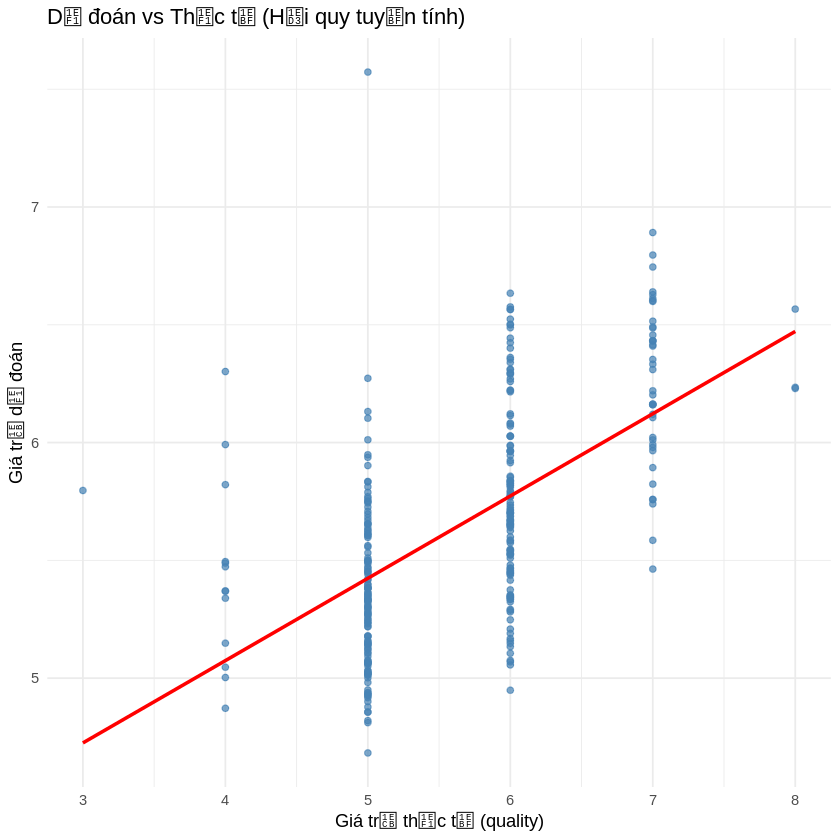

In [ ]:
ggplot(data.frame(Actual = actuals, Predicted = predictions), aes(x = Actual, y = Predicted)) +
  geom_point(color = "steelblue", alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Dự đoán vs Thực tế (Hồi quy tuyến tính)",
       x = "Giá trị thực tế (quality)", y = "Giá trị dự đoán") +
  theme_minimal()

## Biểu đồ Residuals

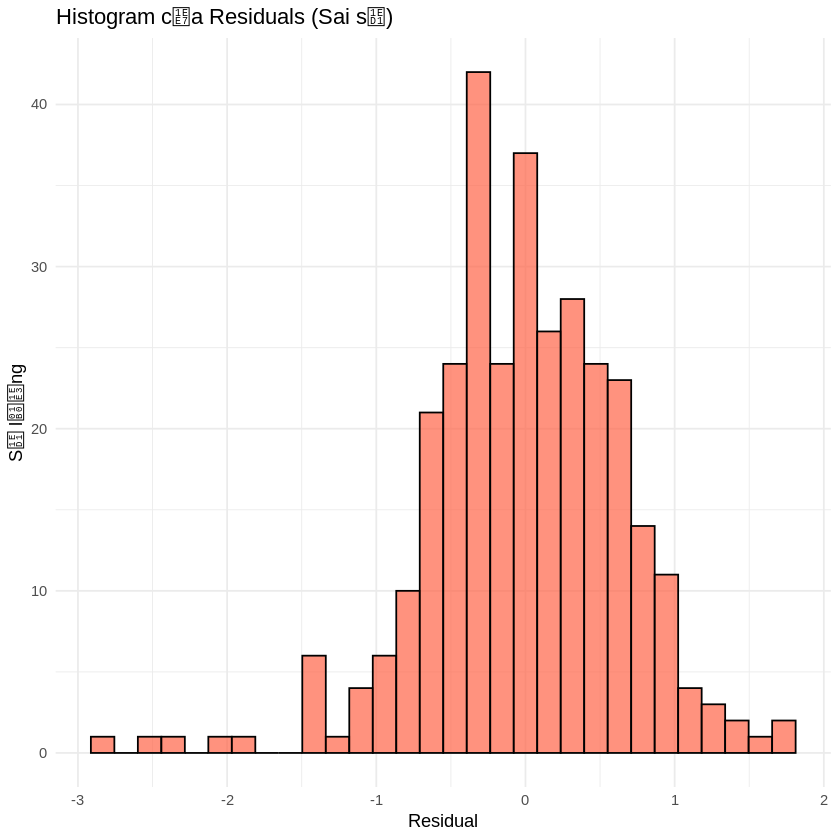

In [ ]:
residuals <- actuals - predictions
ggplot(data.frame(Residuals = residuals), aes(x = Residuals)) +
  geom_histogram(bins = 30, fill = "tomato", color = "black", alpha = 0.7) +
  labs(title = "Histogram của Residuals (Sai số)",
       x = "Residual", y = "Số lượng") +
  theme_minimal()

## Biểu đồ hệ số hồi quy (Coefficient Plot)

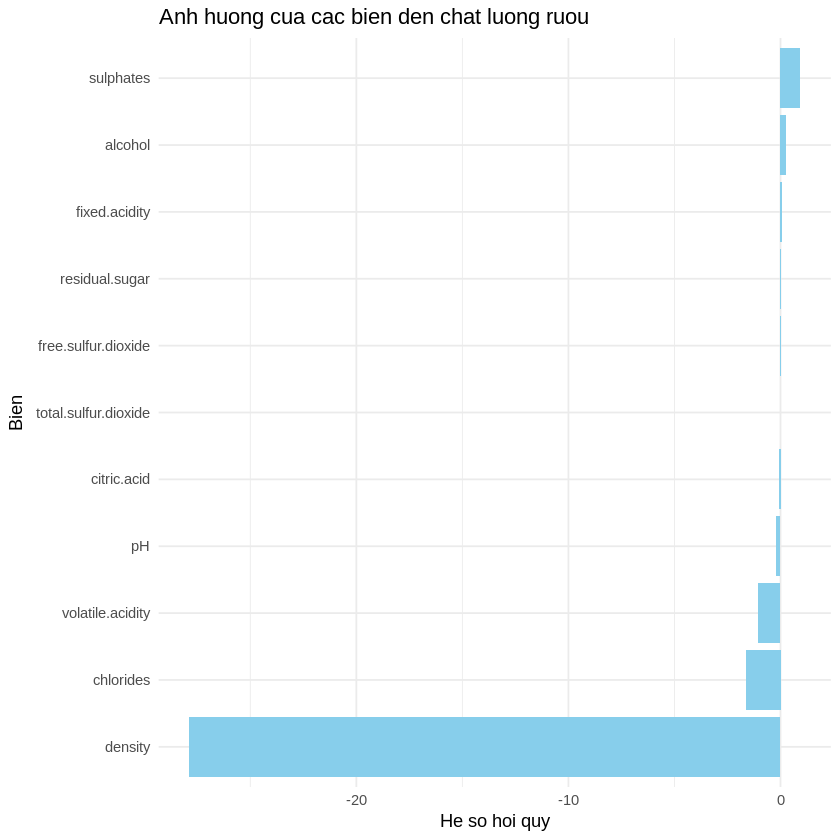

In [ ]:
coef_df <- data.frame(Variable = names(coef(model))[-1],
                      Coefficient = coef(model)[-1])

ggplot(coef_df, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +
  labs(title = "Anh huong cua cac bien den chat luong ruou",
       x = "Bien", y = "He so hoi quy") +
  theme_minimal()
